In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [8]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [19]:
df.duplicated().sum()

np.int64(0)

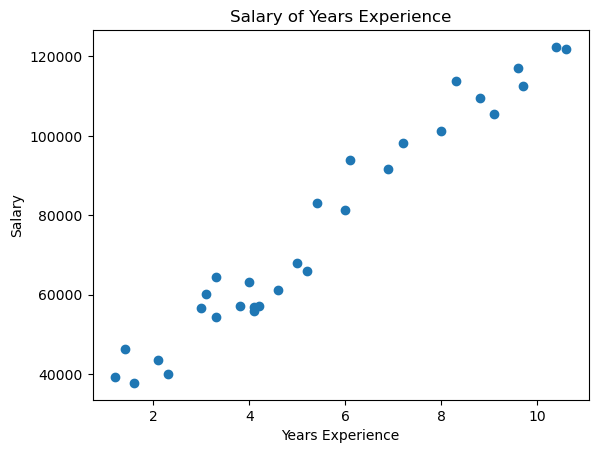

In [43]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary of Years Experience')
plt.show()

In [59]:
X = df[['YearsExperience']] #feature
y = df['Salary'] #target

In [60]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [63]:
 X_train.shape

(24, 1)

In [64]:
X_train.corr()

,YearsExperience
YearsExperience,1.0


In [65]:
linear = LinearRegression()

In [66]:
linear.fit(X_train, y_train)

LinearRegression()

In [67]:
print("m:", linear.coef_)
print("b:", linear.intercept_)

m: [9423.81532303]
b: 24380.20147947369


In [79]:
y_pred = linear.predict(X_test)

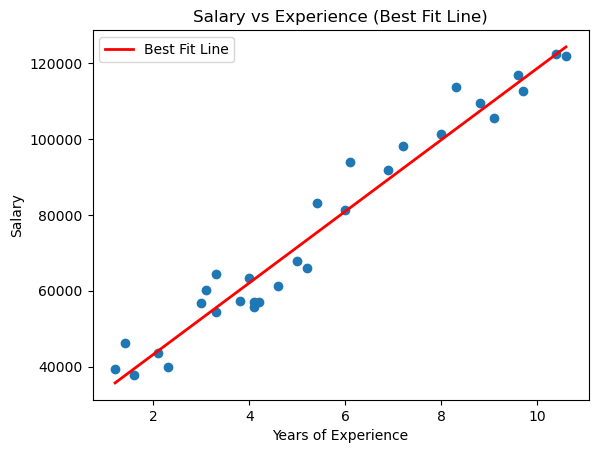

In [80]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X,linear.predict(X),color='red',linewidth=2, label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Best Fit Line)')
plt.legend()
plt.show()

In [86]:
print('Predicted salaries:', y_pred)
print('Actual salaries:', list(y_test))

Predicted salaries: [115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]
Actual salaries: [112636.0, 67939.0, 113813.0, 83089.0, 64446.0, 57190.0]


In [87]:
y_test.values

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.])

In [88]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 6286.453830757745


In [89]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 49830096.855908334


In [90]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.9024461774180498


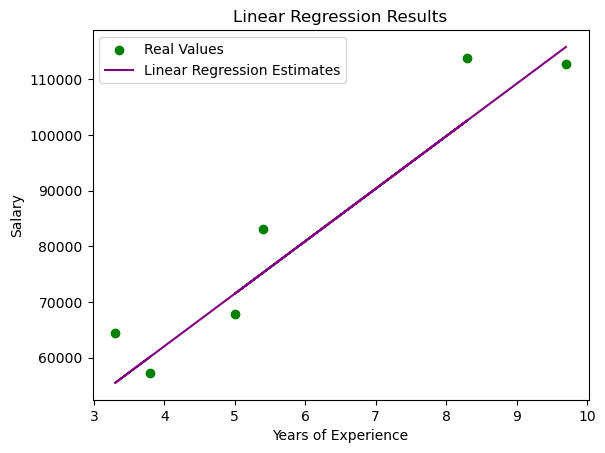

In [93]:
plt.scatter(X_test, y_test, color="green", label="Real Values")
plt.plot(X_test, y_pred, color="purple", label="Linear Regression Estimates")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Results")
plt.legend()
plt.show()